# チェビシェフステップの利用による勾配法の加速

In [77]:
import torch
import matplotlib.pyplot as plt
import math
torch.manual_seed(1) # 乱数の種を固定

In [78]:
n = 10

## 行列$A$の生成

In [79]:
A = torch.normal(torch.zeros(n,n), 1.0)
A = A@A.t() + 0.2*torch.eye(n)

## $A$の固有値を表示してみる

In [80]:
eig = torch.eig(A)
eig

torch.return_types.eig(
eigenvalues=tensor([[32.3290,  0.0000],
        [21.0116,  0.0000],
        [13.3701,  0.0000],
        [11.6366,  0.0000],
        [ 8.3417,  0.0000],
        [ 5.9071,  0.0000],
        [ 0.2250,  0.0000],
        [ 3.7685,  0.0000],
        [ 3.0506,  0.0000],
        [ 1.2348,  0.0000]]),
eigenvectors=tensor([]))

## $A$の最大・最小固有値

In [81]:
l1 = min(eig[0][:,0]).item()
ln = max(eig[0][:,0]).item()

In [82]:
print('l1 = ', l1)
print('ln = ', ln)

l1 =  0.22499212622642517
ln =  32.329036712646484


## チェビシェフステップの表示

In [83]:
def c_root(k, a, b, T):
    return  (a + b)/2.0 + ((b - a)/2.0) * math.cos(math.pi * (2*k+1)/(2*T))

In [84]:
T = 4
cstep = torch.zeros(20)
for k in range(20):
    cstep[k] = 1/c_root(k % T, l1, ln, T)

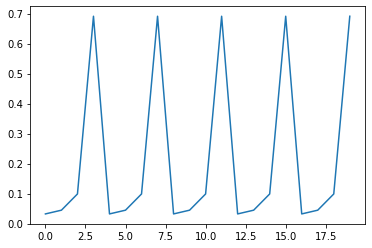

In [85]:
plt.plot(range(20), cstep)

## 勾配法 with チェビシェフステップ

In [86]:
max_itr = 100

In [87]:
T = 1
list_1 = []
x = torch.normal(torch.zeros(n), std=1.0) # 初期値
for k in range(max_itr):
    gamma = 1.0/c_root(k % T, l1, ln, T)
    x = x - gamma * A @ x
    list_1.append(torch.norm(x))

In [88]:
T = 2
list_2 = []
x = torch.normal(torch.zeros(n), std=1.0) # 初期値
for k in range(max_itr):
    gamma = 1.0/c_root(k % T, l1, ln, T)
    x = x - gamma * A @ x
    list_2.append(torch.norm(x))

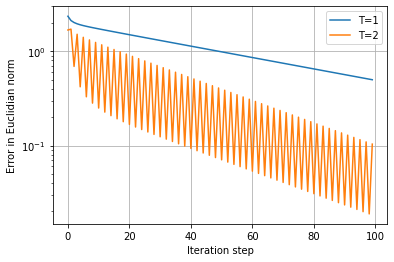

In [89]:
plt.yscale('log')
plt.grid()
plt.xlabel('Iteration step')
plt.ylabel('Error in Euclidian norm')
plt.plot(range(max_itr), list_1, label='T=1')
plt.plot(range(max_itr), list_2, label='T=2')
plt.legend()

## 演習問題 7-1
上記のコードを実行しつつ、内容を理解せよ。この問題についてはレポートによる報告は必要ない。

## 演習問題 7-2
T = 1,2,4 のチェビシェフステップの形状を重ねてプロットせよ。プロットした結果をレポートにて報告せよ。

## 演習問題 7-3
周期$T = 4, T = 8$の場合の勾配法の計算をするコードを書き、結果を重ねてプロットせよ。
